# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [9]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [20]:
# Data Preparation
X = df[['TotalSF']]# pandas DataFrame
y = df["SalePrice"] # pandas Series

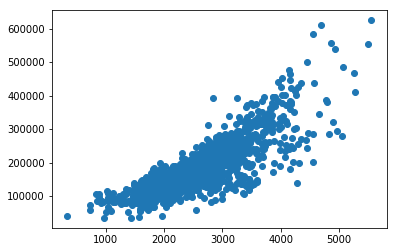

In [21]:
plt.scatter(X,y)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
reg.coef_

array([83.79128706])

In [27]:
reg.intercept_

-33573.95266496137

In [30]:
reg.predict([[3500],[2500]])

array([259695.552062  , 175904.26499715])

In [31]:
xgrid = [ [i] for i in np.linspace(1000,5000,1000)]

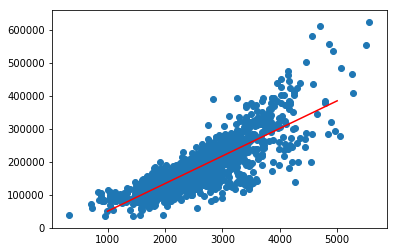

In [32]:
plt.plot(xgrid,reg.predict(xgrid),color='red')
plt.scatter(X,y)

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)

In [36]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
pred = reg.predict(X_test)

# MAE (Mean Absolute Error)
$$\sum_i^N \frac{|y_i -\hat y_i|}{N} = \sum_i^N \frac{e_i}{N}$$

In [40]:
np.mean(np.abs(y_test-pred))

31188.575818243768

In [41]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(y_test,pred)

31188.575818243757

In [45]:
np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)*100

21.02660978281898

In [51]:
mean_absolute_error(y_test,pred)/np.mean(y_train)*100

17.3103223866088

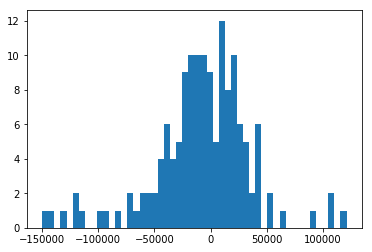

In [54]:
plt.hist(y_test-pred,bins=50);

In [64]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
regk = KNeighborsRegressor(n_neighbors=2)
# Fit the data
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [65]:
mean_absolute_error(y_test,regk.predict(X_test))

35676.17465753425

In [66]:
xt = np.linspace(0,10,100)
yt = np.sin(xt)

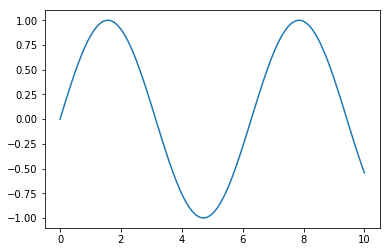

In [67]:
plt.plot(xt,yt);

In [68]:
np.corrcoef(xt,yt)[0][1]

-0.07589466694797199

In [69]:
maes = []
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

In [70]:
np.mean(y_train)

180173.28113063407

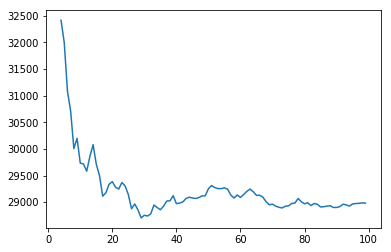

In [72]:
plt.plot(range(4,100),maes)

In [85]:
regk = KNeighborsRegressor(n_neighbors=30)
# Fit the data
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=30, p=2,
          weights='uniform')

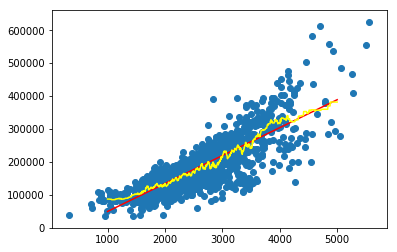

In [86]:
plt.plot(xgrid,reg.predict(xgrid),color='red')
plt.plot(xgrid,regk.predict(xgrid),color='yellow')
plt.scatter(X,y)

In [87]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
np.sqrt(mean_squared_error(regk.predict(X_test),y_test))

41344.55460420043

In [91]:
# Load the library
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
#cross_val_score(regk,X,y,cv=5,scoring="neg_mean_squared_error")
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error")

array([-31601.69152348, -29494.12565865, -30025.67651775, -28430.72714777,
       -32682.97273769])

In [ ]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

In [92]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").std()

1515.5016194207374

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(n_neighbors=3),
                       param_grid={"n_neighbors":np.arange(3,50),
                                  "weights":["uniform","distance"]},
                       scoring='neg_mean_absolute_error')
# Fit will test all of the combinations
reg_test.fit(X,y)

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [110]:
reg_test.best_params_

{'n_neighbors': 49, 'weights': 'uniform'}

In [113]:
reg_test.best_score_

-30223.761301634055

In [111]:
reg_test.best_estimator_.predict(X_test)

array([120239.48979592,  87904.30612245, 171946.36734694, 123094.04081633,
       222818.59183673, 347651.79591837, 227056.75510204, 128266.32653061,
       125441.02040816, 239100.57142857, 215264.93877551, 288101.89795918,
       185857.97959184, 229097.81632653, 146056.18367347, 130022.26530612,
       238282.04081633, 250709.10204082, 130377.71428571, 124026.2244898 ,
       185086.42857143, 305519.81632653, 325675.87755102, 238235.10204082,
       240263.83673469, 159868.36734694, 155626.44897959, 185402.44897959,
       130377.71428571, 127612.44897959, 128250.67346939, 125286.73469388,
       173320.42857143, 190988.73469388, 128466.18367347, 126959.3877551 ,
       170789.2244898 , 251895.53061224, 109835.20408163, 128892.85714286,
       145407.55102041,  99054.02040816, 159070.40816327, 196234.04081633,
       252081.87755102, 195817.71428571, 185086.42857143, 162450.18367347,
       189990.7755102 , 124026.2244898 , 160976.53061224, 234688.18367347,
       176910.28571429, 1

In [112]:
regk_best = reg_test.best_estimator_


In [104]:
cross_val_score?

In [106]:
GridSearchCV?

In [108]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [114]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
regd = DecisionTreeRegressor(max_depth=3)
# Fit the data
regd.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
# Direct Calculation
np.corrcoef(reg.predict(X_test),y_test)[0][1]

0.7901836324299072

In [116]:
np.corrcoef(reg.predict(X_test),y_test)

array([[1.        , 0.79018363],
       [0.79018363, 1.        ]])

In [121]:
# Custom Scorer
from sklearn.metrics import make_scorer
def corr(pred,y_test):
      return np.corrcoef(pred,y_test)[0][1]
# Put the scorer in cross_val_score
cross_val_score(reg,X,y,cv=5,scoring=make_scorer(corr))

array([0.82028343, 0.84861992, 0.8408774 , 0.80859938, 0.80165334])

In [123]:
reg_test = GridSearchCV(DecisionTreeRegressor(),
                       param_grid={"max_depth":np.arange(3,15),
                                  "min_samples_leaf":np.arange(1,100,5)},
                       scoring=make_scorer(corr))
# Fit will test all of the combinations
reg_test.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(corr), verbose=0)

In [124]:
reg_test.best_score_

0.8201403602756803

In [125]:
reg_test.best_params_

{'max_depth': 4, 'min_samples_leaf': 16}

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
reg_test2 = RandomizedSearchCV(DecisionTreeRegressor(),
                       param_distributions={"max_depth":np.arange(3,15),
                                  "min_samples_leaf":np.arange(1,100,5)},
                       scoring=make_scorer(corr),
                             n_iter=5)
# Fit will test all of the combinations
reg_test2.fit(X,y)

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=make_scorer(corr), verbose=0)

In [128]:
reg_test2.best_params_

{'min_samples_leaf': 21, 'max_depth': 4}

In [129]:
reg_test.best_params_

{'max_depth': 4, 'min_samples_leaf': 16}